In [10]:
import pandas as pd

forest_data = pd.read_csv('./datasets/forest_features_20240701.csv')
forest_data.head()

,date,1wk_WIS,1_week_roc,is_wis_above_avg,1st_deriv_stencil,week_of_year,moving_avg_WIS,lagged_1wk_WIS,loc_code,holiday_last_week
0,2023-10-28,19.51,0.320000,0,7.333333,43,13.273333,13.51,18,0
1,2023-11-04,6.51,0.181818,0,4.166667,44,13.176667,19.51,18,0
2,2023-11-11,45.84,0.205128,0,27.750000,45,23.953333,6.51,18,0
3,2023-11-18,11.54,0.851064,0,16.416667,46,21.296667,45.84,18,1
4,2023-11-25,37.36,-0.034483,0,25.750000,47,31.580000,11.54,18,0


In [11]:
# Add population

population_df = pd.read_csv('./datasets/state_populations.csv')
state_pop_map = dict(zip(population_df['state_code'], population_df['population']))

forest_data['population'] = forest_data['loc_code'].map(state_pop_map)
forest_data.head()

,date,1wk_WIS,1_week_roc,is_wis_above_avg,1st_deriv_stencil,week_of_year,moving_avg_WIS,lagged_1wk_WIS,loc_code,holiday_last_week,population
0,2023-10-28,19.51,0.320000,0,7.333333,43,13.273333,13.51,18,0,6785528
1,2023-11-04,6.51,0.181818,0,4.166667,44,13.176667,19.51,18,0,6785528
2,2023-11-11,45.84,0.205128,0,27.750000,45,23.953333,6.51,18,0,6785528
3,2023-11-18,11.54,0.851064,0,16.416667,46,21.296667,45.84,18,1,6785528
4,2023-11-25,37.36,-0.034483,0,25.750000,47,31.580000,11.54,18,0,6785528


In [12]:
forest_data.to_csv('./datasets/forest_features_20240701.csv', index=False)

In [19]:
"""Prepare the data."""

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

df = forest_data.copy()
df.dropna(inplace=True)

features = ['1_week_roc', 
            'population', 
            'week_of_year', 
            'moving_avg_WIS', 
            'lagged_1wk_WIS',
            'holiday_last_week']
X = df[features]
y = df['is_wis_above_avg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
"""Train and evaluate the RF model."""

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       155
           1       0.77      0.64      0.70        69

    accuracy                           0.83       224
   macro avg       0.81      0.78      0.79       224
weighted avg       0.83      0.83      0.83       224



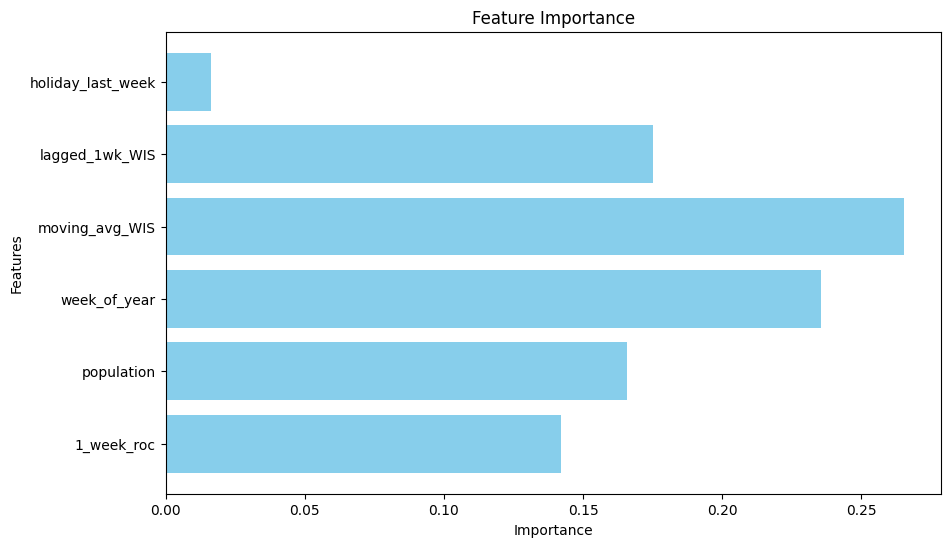

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot Feature Importances
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [1]:
"""Recursive Feature Elimination -- 5 Features"""

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model for RFE
model = LogisticRegression()

# Initialize RFE with the logistic regression model
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Reduce the dataset to selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train Random Forest model with reduced features
rf_model_rfe = RandomForestClassifier(random_state=42)
rf_model_rfe.fit(X_train_rfe, y_train)

# Evaluate the reduced model
y_pred_rfe = rf_model_rfe.predict(X_test_rfe)
print(classification_report(y_test, y_pred_rfe))

NameError: name 'X_train' is not defined

Results are better without population. 